
# Regression - Frame, Acquire & Refine

## Raw Data

You are provided with the following data: **loan_data.csv**  
This is the historical data that the bank has provided. It has the following columns

**Application Attributes**:
- `years`: Number of years the applicant has been employed  
- `ownership`: Whether the applicant owns a house or not  
- `income`:  Annual income of the applicant  
- `age`: Age of the applicant  

**Behavioural Attributes**:
- `grade`:  Credit grade of the applicant

**Outcome Variable**:
- `amount` : Amount of Loan provided to the applicant  
- `default` : Whether the applicant has defaulted or not 
- `interest`: Interest rate charged for the applicant  


## Frame the Problem

- What are the features?
- What is the target?

Discuss?

## Acquire the Data

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Defualt Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
#Load the dataset
df = pd.read_csv('data/loan_data.csv')

In [8]:
#View the first few rows of train
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,nan,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,nan,A,3.00,RENT,36000.00,39
4,0,3000,nan,E,9.00,RENT,48000.00,24


In [10]:
#View the columns of the train dataset
df.columns

Index(['default', 'amount', 'interest', 'grade', 'years', 'ownership',
       'income', 'age'],
      dtype='object')

In [12]:
#View the data types of the train dataset
df.dtypes

default        int64
amount         int64
interest     float64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [13]:
#View the number of records in the data
df.shape

(29092, 8)

In [14]:
#View summary of raw data 
df.describe()

,default,amount,interest,years,income,age
count,29092.00,29092.00,26316.00,28283.00,29092.00,29092.00
mean,0.11,9593.51,11.00,6.15,67168.83,27.70
std,0.31,6323.42,3.24,6.68,63606.52,6.23
min,0.00,500.00,5.42,0.00,4000.00,20.00
25%,0.00,5000.00,7.90,2.00,40000.00,23.00
50%,0.00,8000.00,10.99,4.00,56424.00,26.00
75%,0.00,12250.00,13.47,8.00,80000.00,30.00
max,1.00,35000.00,23.22,62.00,6000000.00,144.00


## Refine the Data

Lets check the dataset for quality and compeleteness
1. Missing Values
2. Outliers

### Check for Missing Values

In [16]:
# Find if df has missing values. Hint: There is a isnull() function
df.isnull().head()

,default,amount,interest,grade,years,ownership,income,age
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


One consideration we check here is the number of observations with missing values for those columns that have missing values. If a column has too many missing values, it might make sense to drop the column.

In [41]:
#let's see how many missing values are present
df.isnull().sum()

default         0
amount          0
interest     2776
grade           0
years         809
ownership       0
income          0
age             0
dtype: int64

In [42]:
df.isnull()

,default,amount,interest,grade,years,ownership,income,age
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [43]:
df[df.isnull().any(axis=1)].head()

,default,amount,interest,grade,years,ownership,income,age
1,0,2400,nan,C,25.00,RENT,12252.00,31
3,0,5000,nan,A,3.00,RENT,36000.00,39
4,0,3000,nan,E,9.00,RENT,48000.00,24
10,0,10000,nan,C,4.00,RENT,42000.00,23
12,0,6000,nan,B,1.00,MORTGAGE,84000.00,30


So, we see that two columns have missing values: **interest and years**. Both the columns are numeric. We have three options for dealing with this missing values

Options to treat Missing Values
- **REMOVE** - NAN rows
- **IMPUTATION** - Replace them with something??
    - Mean 
    - Median
    - Fixed Number - Domain Relevant
    - High Number (999) - Issue with modelling
- **BINNING** - Categorical variable and "Missing becomes a number*
- **DOMAIN SPECIFIC** - Entry error, pipeline, etc.


In [44]:
#Let's replace missing values with the median of the column
df.interest.median()

10.99

In [52]:
?df.fillna

In [58]:
df[df.isnull().any(axis=1)].head(20)

,default,amount,interest,grade,years,ownership,income,age
1,0,2400,nan,C,25.00,RENT,12252.00,31
3,0,5000,nan,A,3.00,RENT,36000.00,39
4,0,3000,nan,E,9.00,RENT,48000.00,24
10,0,10000,nan,C,4.00,RENT,42000.00,23
12,0,6000,nan,B,1.00,MORTGAGE,84000.00,30
35,0,14000,nan,B,6.00,RENT,80000.00,26
38,0,10000,nan,A,11.00,RENT,60000.00,37
41,0,25600,nan,B,9.00,RENT,110000.00,29
48,0,8000,nan,D,0.00,RENT,62000.00,29
58,0,15000,nan,A,1.00,MORTGAGE,52000.00,37


In [64]:
#there's a fillna function
df.fillna(df.median(), inplace=True)

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,10.99,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,10.99,A,3.00,RENT,36000.00,39
4,0,3000,10.99,E,9.00,RENT,48000.00,24
5,0,12000,12.69,B,11.00,OWN,75000.00,28
6,1,9000,13.49,C,0.00,RENT,30000.00,22
7,0,3000,9.91,B,3.00,RENT,15000.00,22
8,1,10000,10.65,B,3.00,RENT,100000.00,28
9,0,1000,16.29,D,0.00,RENT,28000.00,22


In [65]:
#Now, let's check if train has missing values or not
df.isnull().sum()

default      0
amount       0
interest     0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

### Check for Outlier Values

Let us check first the categorical variables

In [66]:
# Which variables are Categorical?
df.dtypes

default        int64
amount         int64
interest     float64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [69]:
df.grade.value_counts()

A    9649
B    9329
C    5748
D    3231
E     868
F     211
G      56
Name: grade, dtype: int64

In [68]:
# Create a Crosstab of those variables with another variable
pd.crosstab(df.grade, df.default)

default,0,1
grade,,
A,9084,565
B,8344,985
C,4904,844
D,2651,580
E,692,176
F,155,56
G,35,21


In [70]:
# Create a Crosstab of those variables with another variable
df.ownership.value_counts()

RENT        14692
MORTGAGE    12002
OWN          2301
OTHER          97
Name: ownership, dtype: int64

Let us check outliers in the continuous variable

- Plotting
    - Histogram
    - Box-Plot 
- Measuring 
    - Z-score > 3
    - Modified Z-score > 3.5
    where modified Z-score = 0.6745 * (x - x_median) / MAD 



In [71]:
# Describe the data set continuous values
df.describe()

,default,amount,interest,years,income,age
count,29092.00,29092.00,29092.00,29092.00,29092.00,29092.00
mean,0.11,9593.51,11.00,6.09,67168.83,27.70
std,0.31,6323.42,3.08,6.59,63606.52,6.23
min,0.00,500.00,5.42,0.00,4000.00,20.00
25%,0.00,5000.00,8.49,2.00,40000.00,23.00
50%,0.00,8000.00,10.99,4.00,56424.00,26.00
75%,0.00,12250.00,13.11,8.00,80000.00,30.00
max,1.00,35000.00,23.22,62.00,6000000.00,144.00


Clearly the `age` variable looks like it has an outlier - Age cannot be greater 100! 
Also the `income` variable looks like it may also have an outlier.

In [87]:
?plt.yscale

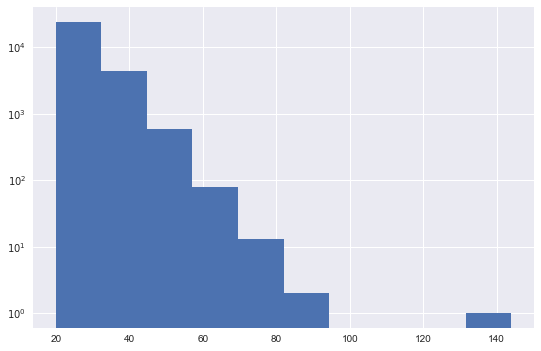

In [88]:
# Make a histogram of age

df.age.hist()
#plt.xlim(60,80)
#plt.ylim(0,100)
plt.yscale('log')

In [74]:
import seaborn as sns

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


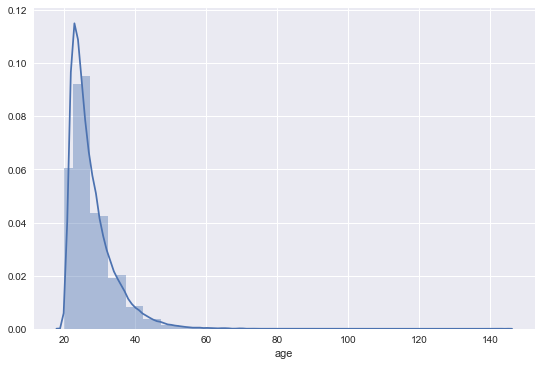

In [75]:
sns.distplot(df.age)

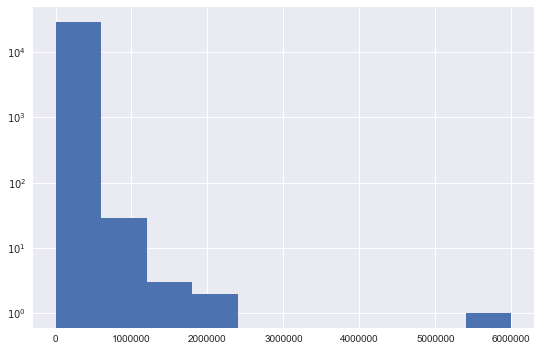

In [89]:
# Make a histogram of income
df.income.hist()
plt.yscale('log')

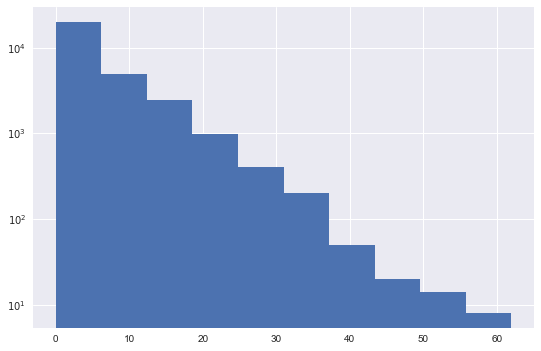

In [91]:
# Make Histograms for all other 
df.years.hist()
plt.yscale('log')

{'boxes': [<matplotlib.lines.Line2D at 0x1147d0cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x1147be780>,
 'fliers': [<matplotlib.lines.Line2D at 0x114bf1be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114793da0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1147d07f0>,
  <matplotlib.lines.Line2D at 0x11476c240>]}

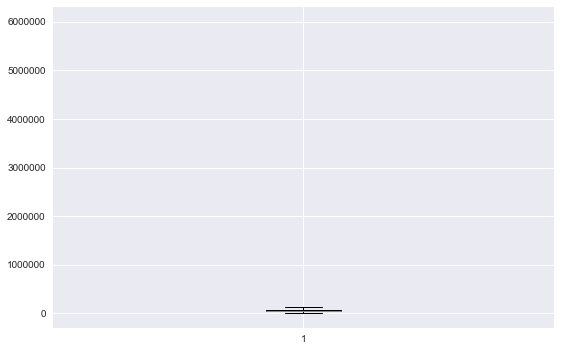

In [95]:
plt.boxplot(df.income)

{'boxes': [<matplotlib.lines.Line2D at 0x114da7ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x114da1fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1147d5fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1147d50f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114da7e10>,
  <matplotlib.lines.Line2D at 0x114da1e10>]}

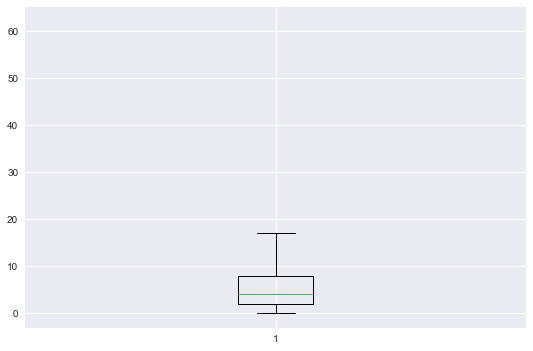

In [98]:
plt.boxplot(df.years)

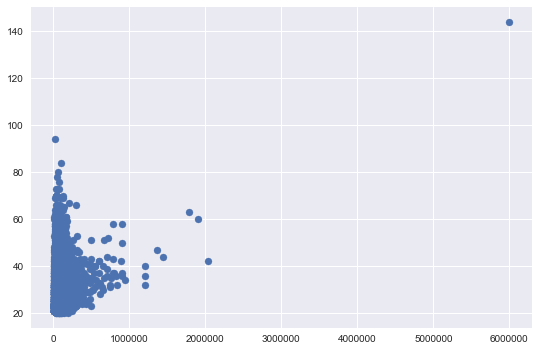

In [99]:
# Make a scatter of age and income
plt.scatter(df.income, df.age)

Find the observation which has age = 144 and remove it from the dataframe

In [102]:
# Find the observation 
df[df.age == df.age.max()]

,default,amount,interest,grade,years,ownership,income,age
19485,0,5000,12.73,C,12.00,MORTGAGE,6000000.00,144


In [105]:
df[df.age == df.age.max()].index

Int64Index([19485], dtype='int64')

In [108]:
df.drop?

In [110]:
# Use drop to remove the observation inplace
df.drop(19485, inplace=True)

In [111]:
# Find the shape of the df
df.shape

(29091, 8)

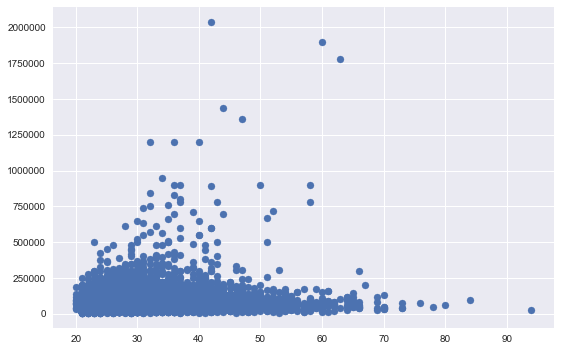

In [112]:
# Check again for outliers
plt.scatter(df.age, df.income)

In [113]:
# Save the new file as cleaned data
df.to_csv("data/loan_data_clean.csv", index=False)

In [ ]:
#We are good to go to the next step